*`LibROSA`* 라는 audio package가 가진 stft, mfcc, melspectrogram 을 이용해서 피쳐(feature)를 추출해봅시다!

* `LibROSA`란?
* `LibROSA`를 이용한 stft, mfcc, melspectrogram

순서로 진행하겠습니다.

*참고자료는 이 주피터파일의 마지막에 정리되어있습니다.*

---

## 1. `LibROSA`란?

`LibROSA`는 음악 및 오디오 분석 파이썬 패키지입니다. 음악 정보 검색 시스템을 만드는 데 필요한 구성 요소를 제공합니다.

## 2. LibROSA를 이용한 stft, mfcc, melspectrogram

지난 시간에 audio recognition, audio classification을 위해서 여러가지 feature를 추출하는 방법에 대한 이론을 훑었습니다. ~~눈에 보이는 것도 이해 못하겠는데 자꾸 주파수 얘기, 달팽이관 얘기 나와서 그만하고 싶었었죠~~

하지만 이번에는 직접 `LibROSA` 패키지를 사용해보면서 이해해보도록 하겠습니다. 전 이게 더 이해하기 쉬울 거라고 믿고있습니다. 제발 🙏

### (1) Audio 파일 로드(load) 

다들 아시다시피 Computer Vision, NLP, Speech Recognition 그 어떤 분야도 데이터 로드하지 않고서는 아무 것도 할 수 없습니다.
그래서 feature 추출 전에 저는 **librosa.core.load** 라는 함수로 mp3 또는 wav 파일을 로드하는 법부터 시작해보겠습니다.

코드 한 줄이면 파일을 로드할 수 있고, 여러가지 arguments, return value가 있으므로 그것들을 훑어보겠습니다.


````
librosa.core.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
````

### - Arguemnts


**1. path    :** 입력 파일 경로(path)

**2. sr      :** Sampling rate, default=22050
> `sampling rate`란 오디오(입력 파일)를 쪼개는 기준이라고 생각하면 되는데, 비율(rate)로 표현을 하므로 **1초당 샘플(sample)의 빈도 수**를 의미합니다. 만약 Sampling rate를 22.05KHz로 설정했다면 이것은 1초당 22050개의 샘플이 있다는 것입니다.
>

**3.mono     :** 신호를 모노로 할 것인지 아닌지
> 아주 간단한 argument이다. `mono`로 하고 싶으면 True, 아니면 False 하면 됩니다.
>
> 그런데 `mono`가 뭔지 알아야 쓰는데,~~제가 아는건 momo 뿐! 모모링🍑~~ `mono`는 채널과 관련있습니다. `mono`는 채널 1개로 이루어져 있을 때를 말합니다. 
> 그렇다면 채널은 무엇일까요? ~~꼬리에 꼬리를 무는게 영원히 공부가 끝나지 않을 것 같습니다..~~ 소리가 모여서 채널을 표현한다고 생각하면 이해가 쉬울 것 같습니다. 2채널이라면 소리 데이터가 왼쪽(L), 오른쪽(R) 각각 소리를 표현하고 있다는 것이고, 1채널이라면 왼쪽(L), 오른쪽(R)이 복사본이라고 합니다.

**4.offset   :** 파일을 해당 오프셋부터 읽는다, default=0.0
> 처음이 아니라 중간 원하는 지점부터 파일을 읽으려면 `offset`을 설정하면 됩니다.

**5.duration :** 파일을 원하는 만큼 읽는다.
> 총 5초인 파일 중 offset을 0.0, duration을 2로 설정한다면 2초까지만 파일을 로드합니다.

**6.dtype    :** 파일의 데이터 타입

**7.res_type :** resample 타입


### - Returns

**1. y       :** 오디오 객체(audio time series)

**2. sr      :** Sampling rate

---

자, 이제 로드하는 방법을 배웠습니다. 이제는 `stft`, `mfcc`, `melspectogram`을 해 볼 차례입니다. load 함수는 세 함수 호출 전에 오디오 파일을 로드할 때 써야되기 때문에, 그 때 한 번 써보도록 하겠습니다.

직접 해보면서 각 함수의 arguments, return value를 살펴보겠습니다.

오늘도 역시 예시 데이터는 **트와이스** 입니다.
미나🐧의 쾌유를 바라면서 트와이스 미나의 목소리를 써보겠습니다. 

두 개 모두 `잠시만요!`라고 말하는 데이터입니다. 아 그리고 저도 몰랐는데 ~~모르는게 한 두 가지가 아니지만~~, mp4파일도 load가 되네요.

`stft`, `mfcc`, `melspectogram` 함수를 써보기 전에 우리의 데이터를 한 번 들어봅시다.

In [20]:
import IPython.display as ipd
ipd.Audio('./mina1.mp4')

In [21]:
ipd.Audio('./mina2.mp4')

---

### (2) STFT

```
librosa.core.stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, dtype=<class 'numpy.complex64'>, pad_mode='reflect')
```

### - Arugments
**1. y           :** 시그널 (audio time series), load 함수의 첫 번째 return value와 같습니다.

**2. n_fft       :** FFT window 사이즈
> 올 것이 왔습니다. ~~지긋지긋한 FT 시리즈~~ 지난번에 이야기했듯이 STFT는 Fourier Transform의 종류 중 하나입니다. 
> 현재 우리가 가진 데이터는 **time series 도메인 데이터** 입니다. 따라서 **frequency 도메인 데이터** 로 변환시켜주기 위해서 FT 방법 중 FFT를 쓸 것이고, FFT는 빠른(Fast) FT를 할 것이기 때문에 입력된 **time series 도메인 데이터** 를 x개로 쪼개면 n_fft가 됩니다. 즉, n_fft 덩어리 하나를 1칸으로 그리겠다는 것이됩니다.
>
> **전체 길이 = x * n_fft** 로 생각하면 될 것 같습니다.

**3. hop_length  :** window끼리 겹칠 사이즈
> 이번에는 왜 `window`끼리 겹치게 하는지에 대해 이야기를 해야겠네요. ~~그냥 함수 가져다 쓰고싶다..~~
>

**4. win_length  :** 
> STFT는 *FFT를 하면 시간과 관련된 정보가 날아가기 때문에 이 단점을 보완해주는 방법* 입니다. 
> 일정한 크기의 `window`를 정해서 이 `window`에 들어온 data에 대해서만 윈도우 함수를 곱해줍니다. `window`가 위치했던 시간을 x축으로 하고 그때의 FFT한 결과를 y축(Frequency)으로 표현해줍니다. 그래서 arguments에 `window` 사이즈가 있는거죠.

**5. window      :** 윈도우 함수 종류
> 위에서 `window` 사이즈를 정하고 윈도우 함수를 곱해준다고 했습니다. 이 함수의 종류를 정해주는 arugment입니다.

**6. center      :**

**7. dtype       :**

**8. pad_mode    :**

In [22]:
# Window the time series.
y_frames = util.frame(y, frame_length=n_fft, hop_length=hop_length)

# Pre-allocate the STFT matrix
stft_matrix = np.empty((int(1 + n_fft // 2), y_frames.shape[1]),
                       dtype=dtype,
                       order='F')

fft = get_fftlib()

# how many columns can we fit within MAX_MEM_BLOCK?
n_columns = int(util.MAX_MEM_BLOCK / (stft_matrix.shape[0] *
                                      stft_matrix.itemsize))

for bl_s in range(0, stft_matrix.shape[1], n_columns):
    bl_t = min(bl_s + n_columns, stft_matrix.shape[1])

    stft_matrix[:, bl_s:bl_t] = fft.rfft(fft_window *
                                         y_frames[:, bl_s:bl_t],
                                         axis=0)
return stft_matrix

NameError: name 'util' is not defined

In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pylab as plt

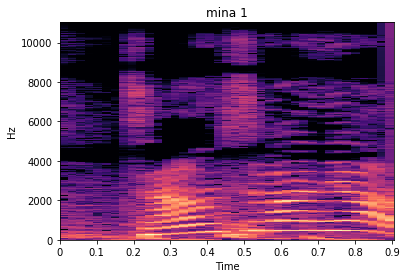

In [17]:
# 파일 로드
y, sr = librosa.load('./mina1.mp4')

# 시각화 코드
D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('mina 1')
plt.show()

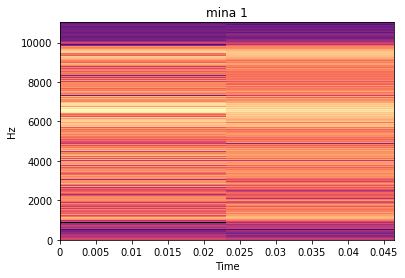

In [15]:
# 파일 로드
y, sr = librosa.load('./mina1.mp4', sr=1000)

# 시각화 코드
D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('mina 1')
plt.show()

## STFT(Short-Time Fourier Transform)


* Arguments

## 참고자료


> [LibROSA](https://librosa.github.io/librosa/)
>
> [음성/음악신호+머신러닝 초심자를 위한 가이드 [1편]](http://keunwoochoi.blogspot.com/2016/01/blog-post.html)
>
> [오디오 용어 설명(sampling rate, bit rate, channels...)](http://blog.naver.com/PostView.nhn?blogId=kimyoseob&logNo=220760163474)
>
> [Mono(모노)와 Stereo(스테레오)](https://m.blog.naver.com/PostView.nhn?blogId=ziokami&logNo=220362290243&proxyReferer=https%3A%2F%2Fwww.google.com%2F)
>
> [[스펙트로그램]](https://0561blue.tistory.com/58)
>
> [스터디 3일차에 했던 다른 공부(stft관련)](https://pdstorage.tistory.com/18)